## Chapter 7: Jordan Neural Networks

A Jordan network is a single hidden layer feed forward
neural network. It is similar to the Elman neural network.
The only difference is that **the context (delay)
neurons are fed from the output layer instead of the hidden
layer**. It therefore “remembers” the output from
the previous time-step. Like the Elman neural network, it is
**useful for predicting time series observations** which have a short
memory.

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from pyneurgen.neuralnet import NeuralNet
from pyneurgen.recurrent import JordanRecurrent

import matplotlib.pyplot as plt
from pylab import plot, legend, subplot

import random

In [3]:
loc = "COE.csv"
temp = pd.read_csv(loc)

data = temp.drop(temp.columns[[0,1]], axis = 1)
y= data['COE$']

x = data.drop(data.columns[[0,4]], axis = 1)
x =x.apply(np.log)
x = pd.concat([x, data['Open?']], axis = 1)


scaler_x = preprocessing. MinMaxScaler(feature_range=(0,1))
x = np.array(x).reshape((len(x),4))
x = scaler_x.fit_transform(x)


scaler_y = preprocessing. MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape((len(y),1))
y = np.log(y)
y = scaler_y.fit_transform(y)

x = x.tolist()
y = y.tolist()

In [4]:
random.seed(2016)

fit1 =NeuralNet()

input_nodes= 4
hidden_nodes = 7
output_nodes= 1

existing_weight_factor =  0.9

fit1.init_layers(input_nodes, [hidden_nodes], output_nodes, JordanRecurrent(existing_weight_factor))
fit1.randomize_network()
fit1.layers[1].set_activation_type('sigmoid')
fit1.set_learnrate(0.05)

fit1.set_all_inputs(x)
fit1.set_all_targets(y)

length = len(x)
# The train set contains approximately 95% of the samples.
learn_end_point = int(length * 0.95)

fit1.set_learn_range(0, learn_end_point)
fit1.set_test_range(learn_end_point + 1, length - 1)
fit1.learn(epochs=100, show_epoch_results=True, random_testing=False)

epoch: 0 MSE: 0.003922711800346182
epoch: 1 MSE: 0.001488878611032201
epoch: 2 MSE: 0.001488259226227149
epoch: 3 MSE: 0.0014897509245429474
epoch: 4 MSE: 0.0014929478962367568
epoch: 5 MSE: 0.0014974033303665096
epoch: 6 MSE: 0.0015026753066008198
epoch: 7 MSE: 0.00150836654246977
epoch: 8 MSE: 0.0015141477388383772
epoch: 9 MSE: 0.0015197638731870788
epoch: 10 MSE: 0.0015250285699732603
epoch: 11 MSE: 0.0015298127395045912
epoch: 12 MSE: 0.0015340320543221837
epoch: 13 MSE: 0.0015376356956510176
epoch: 14 MSE: 0.0015405972279256286
epoch: 15 MSE: 0.0015429076081741725
epoch: 16 MSE: 0.0015445699976894991
epoch: 17 MSE: 0.0015455959754758553
epoch: 18 MSE: 0.0015460027970841915
epoch: 19 MSE: 0.0015458114170669138
epoch: 20 MSE: 0.0015450450645774088
epoch: 21 MSE: 0.001543728219259703
epoch: 22 MSE: 0.0015418858778155039
epoch: 23 MSE: 0.00153954303292423
epoch: 24 MSE: 0.0015367243084314574
epoch: 25 MSE: 0.0015334537104123123
epoch: 26 MSE: 0.0015297544647723338
epoch: 27 MSE: 0.00

Text(0.5, 1.0, 'Mean Squared Error by Epoch')

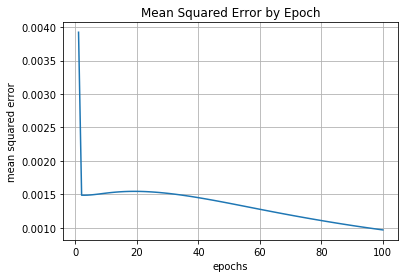

In [5]:
plt.plot(range(1, len(fit1.accum_mse) + 1, 1), fit1.accum_mse)
plt.xlabel('epochs')
plt.ylabel('mean squared error')
plt.grid(True)
plt.title("Mean Squared Error by Epoch")

In [6]:
# test set performance is obtained using the test() function:
mse = fit1.test()
print( "test set MSE = ", np.round(mse, 6))

test set MSE =  8.4e-05


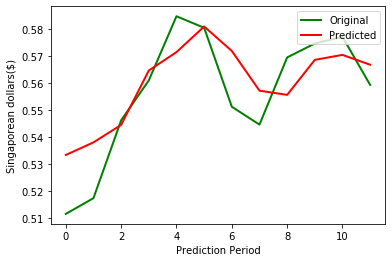

In [7]:
x_values = np.arange(12)
all_targets1 = [item[0][0] for item in fit1.test_targets_activations]
allactuals = [item[1][0] for item in fit1.test_targets_activations]

plt.plot(x_values, all_targets1, 'g-', linewidth=2, markersize=12)
plt.plot(x_values,allactuals, 'r-', linewidth=2, markersize=12)
plt.xlabel('Prediction Period')
plt.ylabel('Singaporean dollars($)')
plt.legend(('Original', 'Predicted'),loc='upper right')

In [8]:
all_targets1

[0.5115646767544664,
 0.5174090798989919,
 0.5462942051781285,
 0.5610954679045019,
 0.5849053802741075,
 0.5806239421115522,
 0.5513256262849617,
 0.5446984685711735,
 0.5696224247910611,
 0.5747940838934837,
 0.5772680753193098,
 0.559415522274407]